# Fashion MNIST dataset

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. Objectve of the model is to identify various fashion items via their photos.

The classes are:

Label	Description

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *

In [34]:
fashion_mnist = keras.datasets.fashion_mnist

In [35]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [36]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [37]:
class_name = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

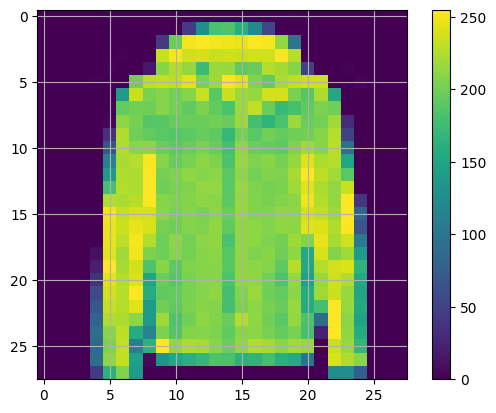

In [38]:
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(True)
plt.show()

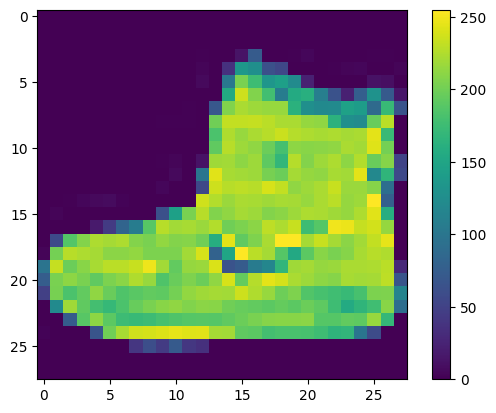

In [39]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
#Normalization
train_images = train_images/255.0
test_images = test_images/255.0

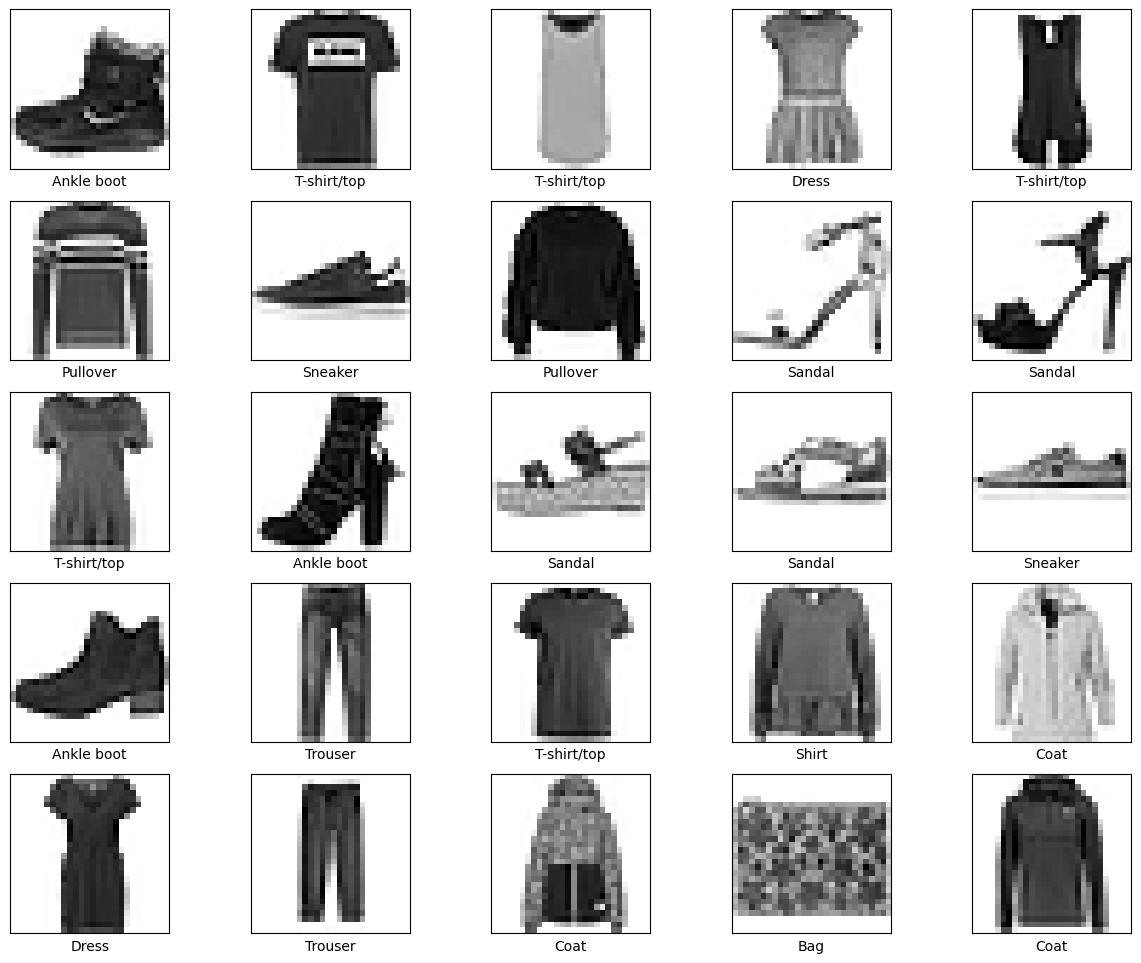

In [41]:
# lets add the class name into train and test image

plt.figure(figsize=(15,12))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [ ]:
# Building the Deep Neaural Network

In [45]:
from keras.callbacks import EarlyStopping

In [61]:
dnn = Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


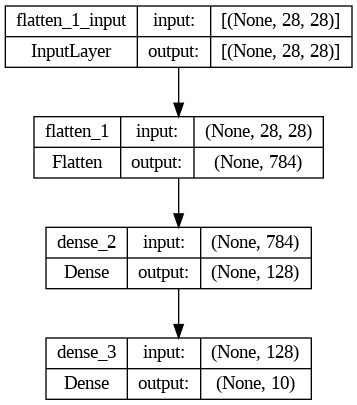

In [63]:
from keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [64]:
callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')
dnn.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(train_images, train_labels, 
          validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2598 - accuracy: 0.9050 - val_loss: 0.5373 - val_accuracy: 0.8584
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2589 - accuracy: 0.9057 - val_loss: 0.5008 - val_accuracy: 0.8705
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2506 - accuracy: 0.9079 - val_loss: 0.5036 - val_accuracy: 0.8738
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9075 - val_loss: 0.5260 - val_accuracy: 0.8680
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2438 - accuracy: 0.9094 - val_loss: 0.5218 - val_accuracy: 0.8734
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2464 - accuracy: 0.9090 - val_loss: 0.5447 - val_accuracy: 0.8674
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2399 - accuracy: 0.9122 - val_loss: 0.5501 - val_accuracy: